# ピクロス

amplifyを使ったピクロスの解法について解説します。

## ピクロスの説明

ピクロスとは、上と左に与えられるヒントを元にマスを塗っていき、絵を完成させるパズルです。

例えばヒントに`5`と書かれていた場合、その列の連続する5マスを黒く塗りつぶすことを表します。`1 1 1`のように複数の数字が書かれていた場合、間に一つ以上の空白を挟んで黒く塗りつぶすことを表します。

以下はヒントに従って塗りつぶされたマスの一例です。

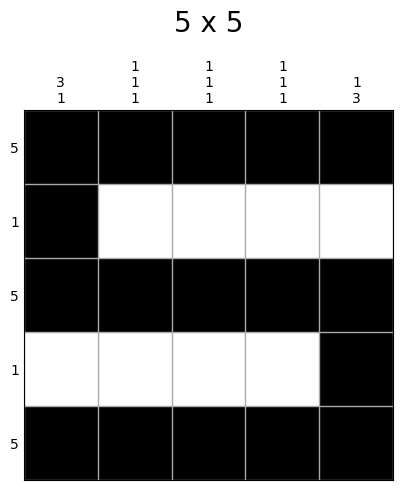

ピクロス行列をプロットする`plt_solution`関数を作成します。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# ピクロス行列をプロット
def plt_solution(v_hints, h_hints, solution=np.zeros((0, 0))):
    if solution.shape[0] == len(v_hints) and solution.shape[1] == len(h_hints):
        solution = solution
    else:
        solution = np.zeros((len(h_hints), len(v_hints)))

    _, ax = plt.subplots()
    ax.tick_params(
        which="both",
        top=True,
        bottom=False,
        labeltop=True,
        labelbottom=False,
        length=0,
    )
    ax.tick_params(axis="x")

    ax.imshow(solution, cmap="Greys", aspect="equal")
    # Major ticks
    ax.set_xticks(np.arange(len(h_hints)))
    ax.set_yticks(np.arange(len(v_hints)))
    # Minor ticks
    ax.set_xticks(np.arange(-0.5, len(h_hints), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(v_hints), 1), minor=True)

    # Labels for major ticks
    ax.set_xticklabels(["\n".join(map(str, hint)) for hint in h_hints])
    ax.set_yticklabels(["  ".join(map(str, hint)) for hint in v_hints])

    ax.set_xlim([-0.5, len(h_hints) - 0.5])
    ax.set_ylim([len(v_hints) - 0.5, -0.5])

    ax.set_title(f"{len(h_hints)} x {len(v_hints)}", fontsize=20, pad=20)
    # Gridlines based on minor ticks
    ax.grid(which="minor", color="#aaaaaa", linestyle="-", linewidth=1)

    return plt.show()

## 初期配置

ピクロスでは、まず最初に上と左のヒントが与えられます。ここでは、以下のような5x5のピクロスのヒントを作成します。

In [ ]:
# 初期配置をリストで表記
v_hints = [[5], [1], [5], [1], [5]]
h_hints = [[3, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 3]]
v_len, h_len = len(v_hints), len(h_hints)

plt_solution(v_hints, h_hints, np.zeros((v_len, h_len)))

# 概略

ピクロスが完成するとは、上と左のヒントが同時に満たされるようにマスが塗られることを指します。

あるピクロスの問題を左のヒントのみを満たすように塗った場合、塗り方は一つに定まりません。例えば、以下のような異なる塗り方が考えられます。

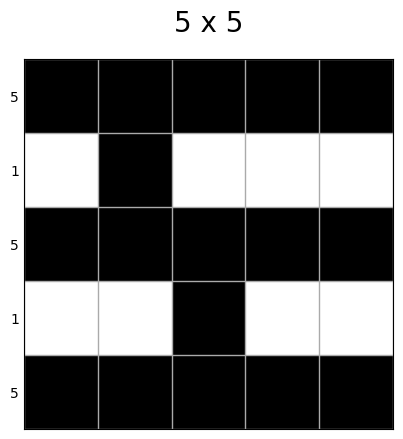
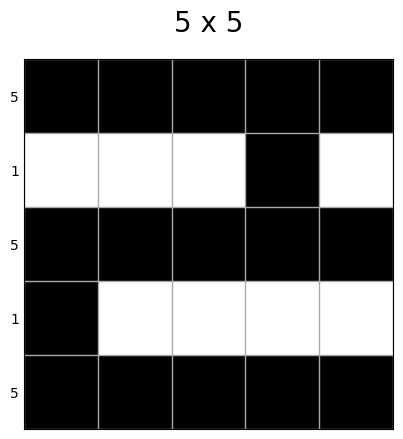

このような左のヒントのみを満たすような塗り方を「塗り方1」とします。

同様に上のヒントのみを満たすような塗り方を「塗り方2」とします。  
「塗り方1」による各マスの白黒が「塗り方2」と一致していたとき、上と左のヒントが同時に満たされてピクロスパズルが完成します。

したがって、次の二つの条件を確認することでピクロスパズルを解いていきます。

* 「塗り方1」と「塗り方2」が一致している
* 縦横各列の塗り方がヒントを満たしている

## 「塗り方1」と「塗り方2」が一致している条件

全てのマスの白と黒が「塗り方1」と「塗り方2」で一致していることが条件です。

## 各縦列と横列の塗り方がヒントを満たしている条件

一列のみを取り出したとき、ヒントを満たすようにマスの塗り方を決める制約を作ります。

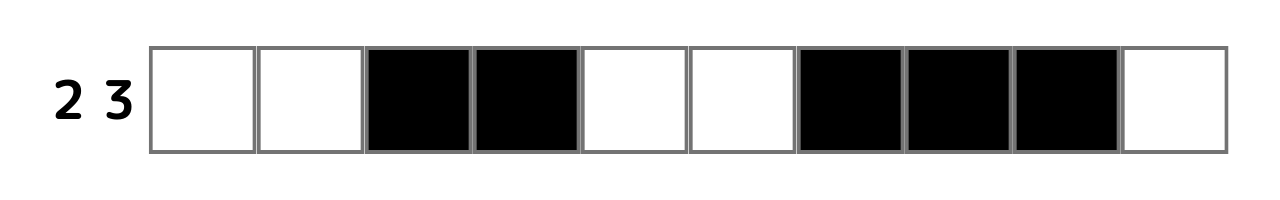

ここで、**黒の先頭**と**黒の最後尾**を以下のように定義します。

- **黒の先頭**とは、前のマスが存在するなら、前のマスは白で塗られなければならない黒である。（下図橙枠）
- **黒の最後尾**とは、後ろのマスが存在するなら、後ろのマスは白で塗られなければならない黒である。（下図緑枠）

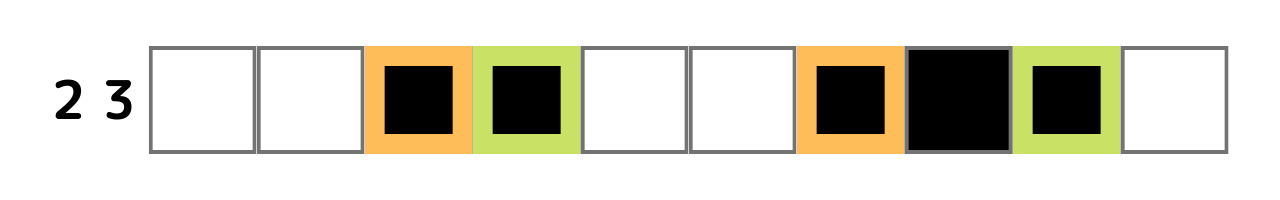

一つ前のマスから次のマスへの遷移という部分に注目して、ピクロスのルールは以下のような制約として考えることができます。

- (a) 各マスは必ず黒か白で塗られる
- (b) 白の次のマスは白か黒の先頭
- (c) 黒の最後尾の次のマスは白
- (d) 黒の最後尾を除く黒の次のマスは黒

以上のような制約条件を適切に定義することで、イジングマシンを使ってピクロスを完成させることができます。

## 状態の定義

今、各マスを白か黒の二種類で表現していますが、制約条件を作るのを簡単にするためにより細かい状態を定義します。

- 黒マスを、何番目に出現した黒マスかによって状態を定義する  
例えば、ヒントが`2 3`と与えられていた場合、黒マスの状態は以下のように定義されます。  

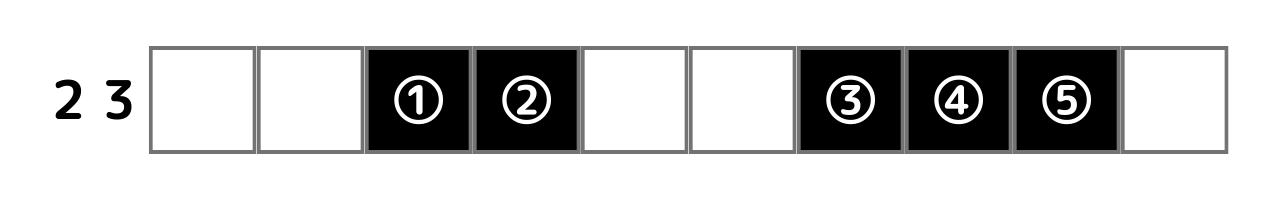

- 白マスを、それまでに出現した黒マスの数によって状態を定義する  
例えばヒントが`2 3`と与えられていた場合、白マスの状態は以下のように定義されます。  

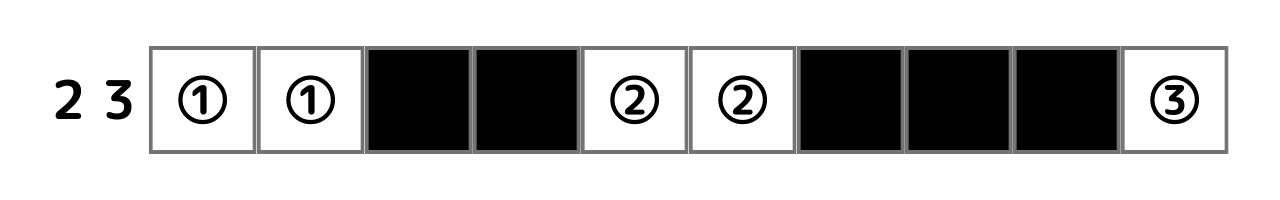

- 定義した状態を出現順に統合する  
例えばヒントが`2 3`と与えられていた場合、状態は以下のように定義されます。  

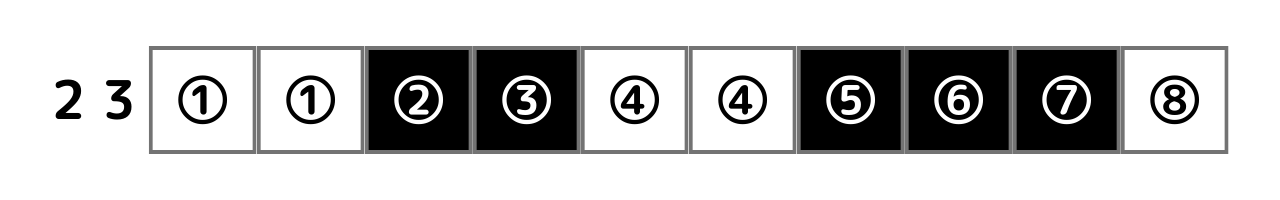

### 変数の割当て例

例えば、`2 3`のヒントのピクロス列に対して以下のような塗りつぶしを行うとします。

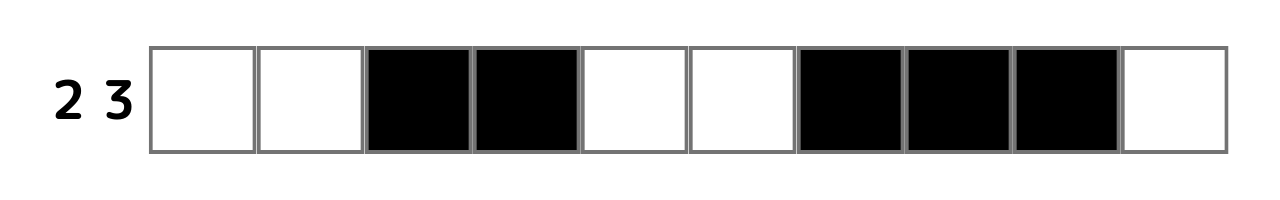

この時の$i$マス目と状態の表は以下のようになります。

| $i$マス目 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| **状態** | 白 | 白 | 黒 | 黒 | 白 | 白 | 黒 | 黒 | 黒 | 白 |

二値変数行列では以下のように表現します。

| $i$マス目 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| **白(状態1)** | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| **黒(状態2)** | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| **黒(状態3)** | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |
| **白(状態4)** | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 0 | 0 |
| **黒(状態5)** | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 |
| **黒(状態6)** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| **黒(状態7)** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 |
| **白(状態8)** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |

以上のようにピクロスパズルの各行・列を定義します。

## 制約条件の定義

一列のみのヒントを満たすような制約は、状態を用いて以下のようになります。

### 初期値制約

以下の図を元に説明します。
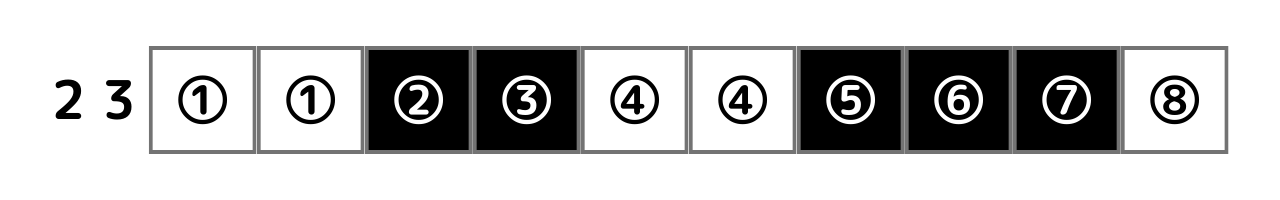

一番左のマスの状態は状態① (最初から一番目の白) または状態② (最初から一番目の黒)になります。

また、状態$k$から遷移できるのは状態$k$または状態$k+1$であることから、他のマスについて、マス$i$ならば状態$i+1$までしか取りえません。

同様に、右側からも代入を行います。変数の割当て例では、以下の箇所を代入で解決できます。

| $i$マス目 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| **白(状態1)** |  |  |  |  | 0 | 0 | 0 | 0 | 0 | 0 |
| **黒(状態2)** |  |  |  |  |  | 0 | 0 | 0 | 0 | 0 |
| **黒(状態3)** | 0 |  |  |  |  |  | 0 | 0 | 0 | 0 |
| **白(状態4)** | 0 | 0 |  |  |  |  |  | 0 | 0 | 0 |
| **黒(状態5)** | 0 | 0 | 0 |  |  |  |  |  | 0 | 0 |
| **黒(状態6)** | 0 | 0 | 0 | 0 |  |  |  |  |  | 0 |
| **黒(状態7)** | 0 | 0 | 0 | 0 | 0 |  |  |  |  |  |
| **白(状態8)** | 0 | 0 | 0 | 0 | 0 | 0 |  |  |  |  |

### 遷移制約

以下の図を元に説明します。
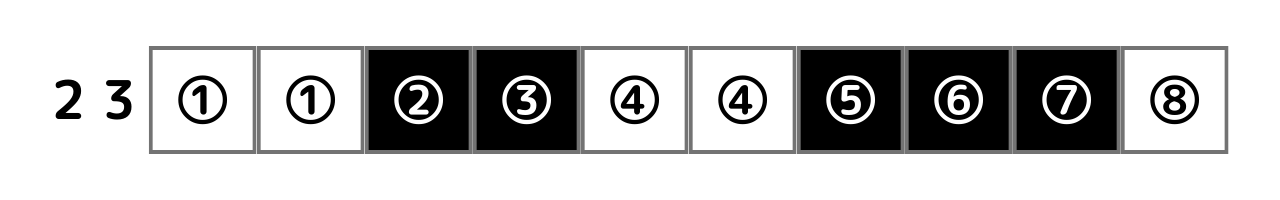

- (a) 各マスはそれぞれ一つの状態をとる
- (b) $i$マス目が状態$k$で、状態$k$が白のとき、$i+1$マス目の状態は状態$k$(白)または状態$k+1$(黒の先頭)  
例えば$i$マス目が状態④(白)のとき、$i+1$マス目の状態は状態④(白)または状態⑤(黒)となります。
- (c) $i$マス目の状態が状態$k$で、状態$k$が黒の最後尾のとき、$i+1$マス目の状態は状態$k+1$(白)  
例えば$i$マス目の状態が状態③(黒)のとき、$i+1$マス目の状態は状態④(白)となります。
- (d) $i$マス目の状態が黒$k$($\neq$最後尾)のとき、$i+1$マス目の状態は黒$k+1$  
例えば$i$マス目の状態が状態⑤(黒)のとき、$i+1$マス目の状態は状態⑥(黒)となります。

### 一致制約

- 任意の$i,j$において、「塗り方1」の$(i,j)$マス目と「塗り方2」の$(i,j)$マス目は、両方黒であるまたは、両方白である。

# 定式化

まず、定式化に必要な定数・変数を定義します。

## ①「塗り方1」と「塗り方2」の一致制約

### 定数①

- $H$: ピクロス行列の縦のマス数
- $V$: ピクロス行列の横のマス数

### 変数①

- $q^{(0)}_{i,j} \in \{0, 1\} \quad (i \in \{1, \dots, H\}) \quad (j \in \{1, \dots, V\})$
- $q^{(1)}_{i,j} \in \{0, 1\} \quad (i \in \{1, \dots, H\}) \quad (j \in \{1, \dots, V\})$

$q^{(0)}$は左のヒントのみを満たす「塗り方1」、$q^{(1)}$は上のヒントのみを満たす「塗り方2」を示します。  
$i$行$j$列目のマスが黒なら$q_{i,j}=1$、白なら$q_{i,j}=0$です。

### 制約条件①

$i \in \{1, ... , H\}, j \in \{1, ... , V\}$に対して以下が成り立ちます。

- $q^{(0)}_{i,j} = q^{(1)}_{i,j}$

## ②一列のみに注目した時の塗り方制約

### 定数②

- $N$: 一列のマス数
- $h_i$: $i$個目のヒントの数字
- $W$: 状態数 ($= 1 + \sum_i (h_i+1)$)
- $s_i$: 状態$i$ ($i \in \{1, \dots, W\}$)
- $S_{\rm{white}}, S_{\rm{black}}$: 白の状態の集合、黒の状態の集合($s_i$は必ず$S_{\rm{white}}$または$S_{\rm{black}}$のいずれかに属する)

### 変数②
- $p_{i,j} \in \{0, 1\} \quad (i \in \{1, \dots, N\}) \quad (j \in \{1, \dots, W\})$

マス$i$の状態が$j$のとき$p_{i,j}=1$、そうでないとき$p_{i,j}=0$です。

### 制約条件②


- 初期値制約

$i \in \{1, ... , N\}, j \in \{1, ... , W\}$に対して以下が成り立ちます。

$$
\left\{
    \begin{align*}
        &\begin{split}
            &p_{i, j} = 0 \quad (j > i+1)
        \end{split}\\
        &\begin{split}
            &p_{i, j} = 0 \quad (W-j > N-i+1)
        \end{split}\\
    \end{align*}
\right.
$$

- 遷移制約

$i \in \{1, ... , N\}$に対して以下が成り立ちます。
$$
\left\{
    \begin{align*}
        &\begin{split}
            (a) \quad &p_{i, j} \land (1-p_{i+1, j}) = p_{i+1, j+1} \quad (\forall j \neq W, s_j \in S_{\rm{white}})
        \end{split}\\
        &\begin{split}
            (b) \quad &p_{i, j} \land (1-p_{i-1, j}) = p_{i-1, j-1} \quad (\forall j \neq 1, s_j \in S_{\rm{white}})
        \end{split}\\
        &\begin{split}
            (c) \quad &p_{i, j} = p_{i+1, j+1} \quad (\forall j, \{s_j, s_{j+1}\} \subset S_{\rm{black}})
        \end{split}\\
        &\begin{split}
            (d) \quad &\sum_j p_{i,j}=1
        \end{split}
    \end{align*}
\right.
$$

### 定式化①と定式化②を繋げる制約条件

②では一列のみの制約について定義しました。実際のピクロスでは、縦列が$H$個、横列が$V$個あるので、$H+V$列分について②の定式化を行う必要があります。そこで変数に上の添え字を追加し、上のヒントか左のヒントか、何列目を指しているかの二つの情報を持たせます。具体的には、添え字を$(a,b)$とし、$a$が$0$のとき左のヒント、$1$のとき上のヒントを示します。$b$は上または左から何列目なのかを示します。これにより、制約条件は以下のように表します。

$i \in \{1, ... , H\}, j \in \{1, ... , V\}$に対して以下が成り立ちます。

$$
\left\{
    \begin{align*}
        &\begin{split}
            (e) \quad &\sum_{k| s^{(0, j)}_k \in S^{(0, j)}_{\rm{black}}} p^{(0, j)}_{i, k} = q^{(0)}_{i,j}
        \end{split}\\
        &\begin{split}
            (f) \quad &\sum_{k| s^{(1, i)}_k \in S^{(1, i)}_{\rm{black}}} p^{(1, i)}_{j, k} = q^{(1)}_{i,j}
        \end{split}
    \end{align*}
\right.
$$

## 制約条件の作成

### 変数の定義

まずは、Amplifyの`BinarySymbolGenerator`を用いて、変数を用意します。

In [ ]:
from amplify import BinarySymbolGenerator

gen = BinarySymbolGenerator()

各マスの黒白を表す二次元配列`q`を定義します。値は、0=白、1=黒に対応します。

In [ ]:
q_from_v_hints = gen.array(v_len, h_len)
q_from_h_hints = gen.array(h_len, v_len)

さらに各行ごとに、(マスの数×状態の数)となる二次元配列`p`を定義します。各マスには一つの状態が割り当てられます。

これらの変数を、左のヒント`v_hints`と上のヒント`h_hints`それぞれに対応するように作成します。

In [ ]:
# 行と列のヒントそれぞれに対応する変数を作成する
# (マスの数, 状態数)の二次元配列
p_from_v_hints = [gen.array(h_len, sum(hint) + len(hint) + 1) for hint in v_hints]
p_from_h_hints = [gen.array(v_len, sum(hint) + len(hint) + 1) for hint in h_hints]

### 代入できる制約条件

変数の代入によって解決できる制約条件は、代入によって変数を節約します。

代入ができるのは、以下の制約条件です。

- 初期値制約: 到達不可能な状態への代入
- 遷移制約(a): $i$マス目の状態が黒$k$($\neq$最後尾)のとき、$i+1$マス目の状態は黒$k+1$
- 定式化①と定式化②を繋げる制約条件

#### 初期値制約: 到達不可能な状態への代入

制約条件は以下の式で表されます。

$$
\left\{
    \begin{align*}
        &\begin{split}
            &p_{i, j} = 0 \quad (j > i+1)
        \end{split}\\
        &\begin{split}
            &p_{i, j} = 0 \quad (W-j > N-i+1)
        \end{split}\\
    \end{align*}
\right.
$$

In [ ]:
def substitute_according_to_init_constraints(p):
    n = p.shape[0]
    for i in range(n):
        # 初期値制約: 到達不可能な状態への代入
        p[i, i + 2 :] = 0
        p[-i - 1, : -i - 2] = 0


for p in p_from_v_hints:
    substitute_according_to_init_constraints(p)

for p in p_from_h_hints:
    substitute_according_to_init_constraints(p)

#### 遷移制約(a): $i$マス目の状態が黒$k$($\neq$最後尾)のとき、$i+1$マス目の状態は黒$k+1$

制約条件は以下の式で表されます。

$$ p_{i, j} = p_{i+1, j+1} \quad (\forall j, \{s_j, s_{j+1}\} \subset S_{\rm{black}}) $$

In [ ]:
def substitute_according_to_black_constraints(p, hint):
    # 黒である状態のindexを保管する
    s_black_indexes = set()
    cursor = 0
    for h in hint:
        s_black_indexes |= set(range(cursor + 1, cursor + 1 + h))
        cursor += h + 1

    # 遷移制約(a): iマス目の状態が黒j(≠最後尾)のとき、i+1マス目の状態は黒j+1
    n = p.shape[0]
    w = p.shape[1]
    for i in range(n - 2, -1, -1):
        for j in range(w - 2, -1, -1):
            if j in s_black_indexes and j + 1 in s_black_indexes:
                p[i, j] = p[i + 1, j + 1]


for p, hint in zip(p_from_v_hints, v_hints):
    substitute_according_to_black_constraints(p, hint)

for p, hint in zip(p_from_h_hints, h_hints):
    substitute_according_to_black_constraints(p, hint)

#### 定式化①と定式化②を繋げる制約条件

制約条件は以下の式で表されます。

$$
\left\{
    \begin{align*}
        &\begin{split}
            &\sum_{k| s^{(0, j)}_k \in S^{(0, j)}_{\rm{black}}} p^{(0, j)}_{i, k} = q^{(0)}_{i,j}
        \end{split}\\
        &\begin{split}
            &\sum_{k| s^{(1, i)}_k \in S^{(1, i)}_{\rm{black}}} p^{(1, i)}_{j, k} = q^{(1)}_{i,j}
        \end{split}
    \end{align*}
\right.
$$

一般に白である状態の数の方が、黒である状態の数より多いので、参照する変数の数を減らすために以下の式にします。（上の式と同義）

$$
\left\{
    \begin{align*}
        &\begin{split}
            &\sum_{k| s^{(0, j)}_k \in S^{(0, j)}_{\rm{white}}} p^{(0, j)}_{i, k} = 1-q^{(0)}_{i,j}
        \end{split}\\
        &\begin{split}
            &\sum_{k| s^{(1, i)}_k \in S^{(1, i)}_{\rm{white}}} p^{(1, i)}_{j, k} = 1-q^{(1)}_{i,j}
        \end{split}
    \end{align*}
\right.
$$

In [ ]:
from amplify import sum_poly


def substitute_according_to_chain_constraints(q, p, hint):
    n = q.shape[0]
    for j in range(n):
        # 白である状態のindexを保管する
        s_white_indexes = {0}
        cursor = 0
        for h in hint:
            s_white_indexes.add(cursor + 1 + h)
            cursor = cursor + 1 + h

        # 定式化①と定式化②を繋げる制約条件
        eq = 1 - sum_poly(s_white_indexes, lambda k: p[j, k])
        q[j] = eq


for q, p, hint in zip(q_from_v_hints, p_from_v_hints, v_hints):
    substitute_according_to_chain_constraints(q, p, hint)

for q, p, hint in zip(q_from_h_hints, p_from_h_hints, h_hints):
    substitute_according_to_chain_constraints(q, p, hint)

### 制約条件の追加

#### 遷移制約(b): 各マスはそれぞれ一つの状態をとる

任意の$i$について、以下の制約条件が成り立ちます。
$$ \sum_{j} q_{ij} = 1 $$

In [ ]:
from amplify.constraint import equal_to


def make_state_constraints(p, label=""):
    state_constraints = []

    # 遷移制約(b): 各マスはそれぞれ一つの状態をとる
    n = p.shape[0]
    w = p.shape[1]
    for j in range(n):
        c = sum_poly(w, lambda k: p[j, k])
        state_constraints.append(equal_to(c, 1, label=f"{label}{j}マス目の一状態制約"))

    return state_constraints

#### 遷移制約(c): $i$マス目の状態が空白$k$のとき、$i+1$マス目の状態は空白または黒の先頭

制約条件は以下の式で表されます。

$$p_{i, j} \land (1-p_{i+1, j}) = p_{i+1, j+1} \quad (j \neq W, \forall s_j \in S_{\rm{white}})$$

以下のペナルティ関数とすることによって補助変数を節約します。

$$
penalty = \left\{
\begin{array}{ll}
-p_{i,j}p_{i+1,j} - 2p_{i,j}p_{i+1,j+1} + 2p_{i+1,j}p_{i+1,j+1} + p_{i,j} + p_{i+1,j+1} & (j \neq W)\\
-p_{i,j}p_{i+1,j} + p_{i,j} & (j = W)
\end{array}
\right.
$$

In [ ]:
from amplify.constraint import penalty


def make_white_constraints(p, hint, label=""):
    white_constraints = []

    # 白である状態のindexを保管する
    s_white_indexes = {0}
    cursor = 0
    for h in hint:
        s_white_indexes.add(cursor + 1 + h)
        cursor = cursor + 1 + h

    # 遷移制約(c): iマス目の状態が空白kのとき、i+1マス目の状態は空白または黒の先頭
    n = p.shape[0]
    w = p.shape[1]
    for i in range(n - 1):
        for j in s_white_indexes:
            if j == w - 1:
                c = -p[i, j] * p[i + 1, j] + p[i, j]
            else:
                c = (
                    -p[i, j] * p[i + 1, j]
                    - 2 * p[i, j] * p[i + 1, j + 1]
                    + 2 * p[i + 1, j] * p[i + 1, j + 1]
                    + p[i, j]
                    + p[i + 1, j + 1]
                )
            white_constraints.append(
                penalty(c, label=f"{label}{i}マス目の空白(状態{j})からの遷移制約")
            )

    return white_constraints

#### 遷移制約(d): $i$マス目の状態が空白$k$のとき、$i-1$マス目の状態は空白または黒の最後尾

制約条件は以下の式で表されます。

$$ p_{i, j} \land (1-p_{i-1, j}) = p_{i-1, j-1} \quad (j \neq 1, \forall s_j \in S_{\rm{white}}) $$

以下のペナルティ関数とすることによって補助変数を節約します。

$$
\rm{penalty} = \left\{
\begin{array}{ll}
-p_{i,j}p_{i-1,j} - 2p_{i,j}p_{i-1,j-1} + 2p_{i-1,j}p_{i-1,j-1} + p_{i,j} + p_{i-1,j-1} & (j \neq 1)\\
-p_{i,j}p_{i-1,j} + p_{i,j} & (j = 1)
\end{array}
\right.
$$

In [ ]:
def make_last_black_constraints(p, hint, label=""):
    last_black_constraints = []

    # 白である状態のindexを保管する
    s_white_indexes = {0}
    cursor = 0
    for h in hint:
        s_white_indexes.add(cursor + 1 + h)
        cursor = cursor + 1 + h

    # 遷移制約(d): iマス目の状態が空白kのとき、i-1マス目の状態は空白または黒の最後尾
    n = p.shape[0]
    for i in range(1, n):
        for j in s_white_indexes:
            if j == 0:
                c = -p[i, j] * p[i - 1, j] + p[i, j]
            else:
                c = (
                    -p[i, j] * p[i - 1, j]
                    - 2 * p[i, j] * p[i - 1, j - 1]
                    + 2 * p[i - 1, j] * p[i - 1, j - 1]
                    + p[i, j]
                    + p[i - 1, j - 1]
                )
            last_black_constraints.append(
                penalty(c, label=f"{label}{i}マス目の空白(状態{j})への遷移制約")
            )

    return last_black_constraints

遷移制約(b), (c), (d)を合わせます。

In [ ]:
state_constraints = []
white_constraints = []
last_black_constraints = []
for i in range(len(p_from_v_hints)):
    p, hint = p_from_v_hints[i], v_hints[i]
    state_constraints += make_state_constraints(p, label=f"縦{i}列")
    white_constraints += make_white_constraints(p, hint, label=f"縦{i}列")
    last_black_constraints += make_last_black_constraints(p, hint, label=f"縦{i}列")
v_constraints = (
    sum(state_constraints) + sum(white_constraints) + sum(last_black_constraints)
)

state_constraints = []
white_constraints = []
last_black_constraints = []
for i in range(len(p_from_h_hints)):
    p, hint = p_from_h_hints[i], h_hints[i]
    state_constraints += make_state_constraints(p, label=f"横{i}列")
    white_constraints += make_white_constraints(p, hint, label=f"横{i}列")
    last_black_constraints += make_last_black_constraints(p, hint, label=f"横{i}列")
h_constraints = (
    sum(state_constraints) + sum(white_constraints) + sum(last_black_constraints)
)

## ①「塗り方1」と「塗り方2」の一致制約

制約条件は以下で表されます。

$$
q^{(0)}_{i,j} - q^{(1)}_{i,j} = 0
$$

In [ ]:
eq_constraints = []
for y in range(v_len):
    for x in range(h_len):
        # 「塗り方1」と「塗り方2」の一致制約
        c = q_from_v_hints[y, x] - q_from_h_hints[x, y]
        eq_constraints.append(equal_to(c, 0, label=f"マス{x},{y}の一致制約"))

eq_constraints = sum(eq_constraints)

これで全ての制約条件が出そろったので、これらの制約条件を全て足し合わせます。一致制約は縦・横の制約に合わせるため、2倍して重みを付けます。

In [ ]:
constraints = v_constraints + h_constraints + eq_constraints * 2

## イジングマシンの実行

先ほど作成した`constraints`を用いてイジングマシンを実行します。まずイジングマシンのクライアントを作成し、パラメータを作成します。その後ソルバーを作成します。

In [ ]:
from amplify import Solver
from amplify.client import FixstarsClient

client = FixstarsClient()
client.parameters.timeout = 1000

solver = Solver(client)

 制約条件 `constraints` を `BinaryQuadraticModel` に与えることでの論理模型クラスとして定式化し、これを先ほど設定した `solver` に与えて実行します。

In [ ]:
from amplify import BinaryQuadraticModel

model = BinaryQuadraticModel(constraints)
result = solver.solve(model)
if len(result.solutions) == 0:
    raise RuntimeError("No solution was found")

values = result.solutions[0].values

## 求解結果の確認

実行結果は`values`に格納されています。変数配列`q_from_v_hints`の`decode`メンバ関数に`values`を与えることで変数配列に結果が代入されます。

In [ ]:
solution = q_from_v_hints.decode(values)

最後に`plt_solution`関数を用いて解答を出力します。

In [ ]:
plt_solution(v_hints, h_hints, solution)

# 高度なチューニング

より大規模な問題を求解可能とするためには変数の数を減らす必要があります。そこで、いくつかの制約式を代入で解決することによって変数の数を減らします。

`BinaryPoly`型の多項式では、`asdict()`関数を用いることにより多項式を一つずつの項に分割することができます。  
この節では、`asdict()`関数を使い、 項が二つ以下のみの等式制約を検出し、検出した制約を変数への代入に書き換えることで、変数の数と制約条件の数を減らします。

大規模な問題として、今回は 15x15 のピクロスパズルを用います。

In [ ]:
# 初期配置をリストで表記
v_hints = [
    [],
    [5],
    [1, 1],
    [5, 1],
    [1, 1, 1],
    [1, 1, 5],
    [1, 2, 1],
    [9, 1],
    [1, 1, 1, 1],
    [5, 1, 1, 1],
    [1, 1, 1, 2],
    [1, 1, 5],
    [1, 2],
    [5],
    [],
]
h_hints = [
    [],
    [5],
    [2, 1],
    [5, 1, 1],
    [2, 1, 1, 1],
    [1, 1, 1, 5],
    [1, 1, 1, 1],
    [1, 9],
    [1, 2, 1],
    [5, 1, 1],
    [1, 1, 1],
    [1, 5],
    [1, 1],
    [5],
    [],
]
v_len, h_len = len(v_hints), len(h_hints)

plt_solution(v_hints, h_hints, np.zeros((v_len, h_len)))

変数を定義します。

In [ ]:
gen = BinarySymbolGenerator()

q_from_v_hints = gen.array(v_len, h_len)
q_from_h_hints = gen.array(h_len, v_len)

p_from_v_hints = [gen.array(h_len, sum(hint) + len(hint) + 1) for hint in v_hints]
p_from_h_hints = [gen.array(v_len, sum(hint) + len(hint) + 1) for hint in h_hints]

代入できる制約条件を代入します。

In [ ]:
for q, p, hint in zip(q_from_v_hints, p_from_v_hints, v_hints):
    substitute_according_to_init_constraints(p)
    substitute_according_to_black_constraints(p, hint)
    substitute_according_to_chain_constraints(q, p, hint)

for q, p, hint in zip(q_from_h_hints, p_from_h_hints, h_hints):
    substitute_according_to_init_constraints(p)
    substitute_according_to_black_constraints(p, hint)
    substitute_according_to_chain_constraints(q, p, hint)

`asdict()`関数を使い、 項が二つ以下のみの等式制約を検出し、検出した制約を変数への代入に書き換えることで、変数の数と制約条件の数を減らします。

まずは項が二つ以下のみの等式制約を検出し、代入する変数と等式で結ばれる多項式のペアを`substitute_dicts`に格納していきます。

In [ ]:
substitute_dicts = dict()
for x in range(h_len):
    for y in range(v_len):
        c_dict = (q_from_v_hints[y, x] - q_from_h_hints[x, y]).asdict()
        for k, v in c_dict.items():
            if len(k) == 0:
                continue

            # substitute_dictsへの格納
            # 右辺の多項式が0 <= d <= 1を満たす場合のみ代入
            d = dict()
            d_max, d_min = 0, 0
            for k2, v2 in c_dict.items():
                if k == k2:
                    continue
                d[k2] = v2 / v * (-1)
                if len(k2) == 0:
                    d_max += d[k2]
                    d_min += d[k2]
                elif d[k2] > 0:
                    d_max += d[k2]
                else:
                    d_min += d[k2]
            if d_min < 0 or d_max > 1:
                continue
            substitute_dicts[k] = d

            # q_from_v_hintsとq_from_h_hintsを一致させる
            if k in q_from_v_hints[y, x].asdict():
                q_from_v_hints[y, x] = q_from_h_hints[x, y]
            else:
                q_from_h_hints[x, y] = q_from_v_hints[y, x]
            break

`p_from_v_hints`と`p_from_h_hints`に`substitute_dicts`の内容を反映させます。

In [ ]:
from amplify import BinaryPoly


def substitute_according_to_dicts(p, substitute_dicts):
    for j in range(p.shape[0]):
        for k in range(p.shape[1]):
            d = p[j, k].asdict()
            if len(d) == 0:
                continue
            key, _ = d.popitem()
            if key in substitute_dicts:
                p[j, k] = BinaryPoly(substitute_dicts[key])


for p in p_from_v_hints:
    substitute_according_to_dicts(p, substitute_dicts)

for p in p_from_h_hints:
    substitute_according_to_dicts(p, substitute_dicts)

通常の定式化と同様に制約条件を作成します。

In [ ]:
state_constraints = []
white_constraints = []
last_black_constraints = []
for i in range(len(p_from_v_hints)):
    p, hint = p_from_v_hints[i], v_hints[i]
    state_constraints += make_state_constraints(p, label=f"縦{i}列")
    white_constraints += make_white_constraints(p, hint, label=f"縦{i}列")
    last_black_constraints += make_last_black_constraints(p, hint, label=f"縦{i}列")
v_constraints = (
    sum(state_constraints) + sum(white_constraints) + sum(last_black_constraints)
)

state_constraints = []
white_constraints = []
last_black_constraints = []
for i in range(len(p_from_h_hints)):
    p, hint = p_from_h_hints[i], h_hints[i]
    state_constraints += make_state_constraints(p, label=f"横{i}列")
    white_constraints += make_white_constraints(p, hint, label=f"横{i}列")
    last_black_constraints += make_last_black_constraints(p, hint, label=f"横{i}列")
h_constraints = (
    sum(state_constraints) + sum(white_constraints) + sum(last_black_constraints)
)

eq_constraints = []
for y in range(v_len):
    for x in range(h_len):
        c = q_from_v_hints[y, x] - q_from_h_hints[x, y]
        eq_constraints.append(equal_to(c, 0, label=f"マス{x},{y}の一致制約"))
eq_constraints = sum(eq_constraints)

constraints = v_constraints + h_constraints + eq_constraints * 2

イジングマシンのクライアントを作成し、パラメータを作成します。その後ソルバーを作成します。

In [ ]:
client = FixstarsClient()
client.parameters.timeout = 5000

solver = Solver(client)

 制約条件 `constraints` を `BinaryQuadraticModel` に与えることでの論理模型クラスとして定式化し、これを先ほど設定した `solver` に与えて実行します。

In [ ]:
model = BinaryQuadraticModel(constraints)
result = solver.solve(model)
if len(result.solutions) == 0:
    raise RuntimeError("No solution was found")

values = result.solutions[0].values

変数配列`q_from_v_hints`の`decode`メンバ関数に`values`を与え、変数配列に結果を代入します。

In [ ]:
solution = q_from_v_hints.decode(values)

最後に`plt_solution`関数を用いて解答を出力します。

In [ ]:
plt_solution(v_hints, h_hints, solution)